**0. Описание задачи**


Задача состоит в анализе и обработке данных о пассажирах Титаника с целью предсказания их выживания на основе различных признаков. Данные включают демографическую информацию, класс билета, стоимость билета, место посадки и другие характеристики.

**1. Прочитать данные**

In [47]:
import pandas as pd

data = pd.read_csv('tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**2. Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать.**

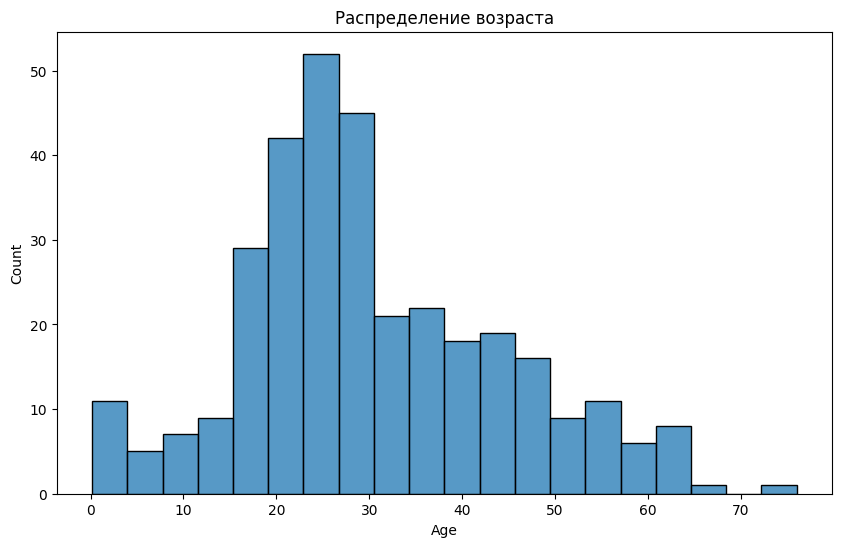

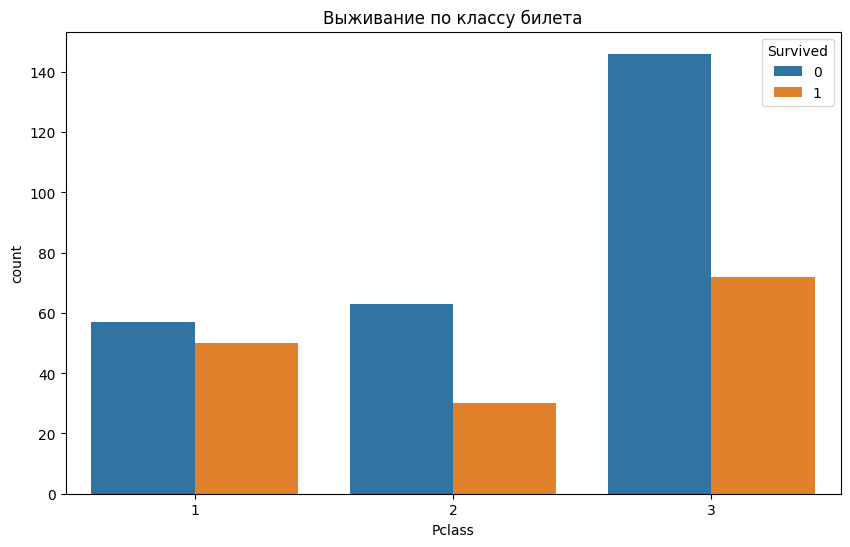

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма возраста
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'].dropna(), bins=20)
plt.title('Распределение возраста')
plt.show()

# Бар-график выживания по классу билета
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Выживание по классу билета')
plt.show()

In [49]:
print(data.describe())
print(data['Survived'].value_counts())
print(data['Pclass'].value_counts())
print(data['Sex'].value_counts())
print(data['Embarked'].value_counts())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  
Survived
0    266
1    152
Name: count, dtype: int64
Pclass
3    218
1    107
2  

Корреляционная матрица

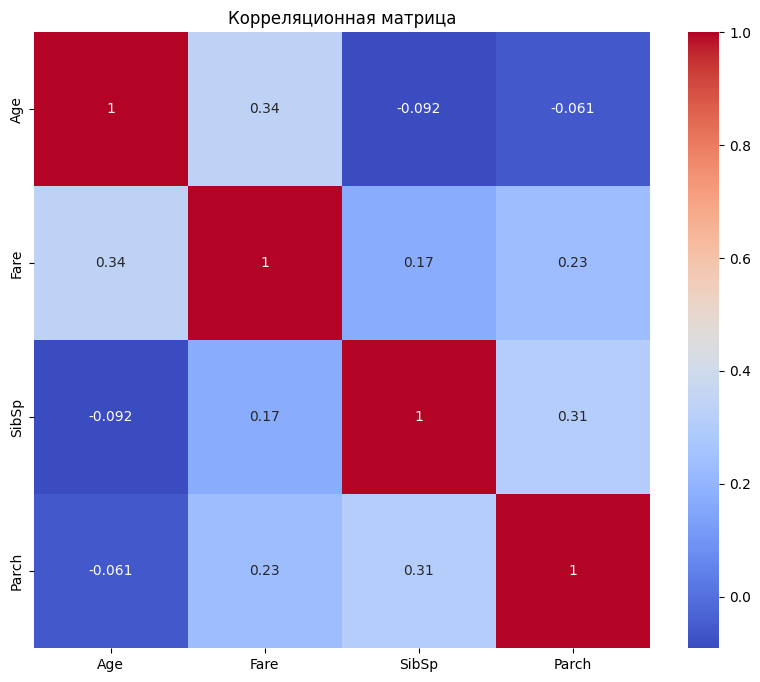

In [50]:
corr_matrix = data[['Age', 'Fare', 'SibSp', 'Parch']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Корреляционная матрица')
plt.show()

Корреляционная матрица показывает сильную корреляцию между некоторыми переменными.

**3. Обработать пропущенные значения (или убедиться, что их нет)**
Пропущенные значения присутствуют в столбцах Age и Cabin.

In [51]:
# Заполнение пропущенных значений возраста медианой
data['Age'] = data['Age'].fillna(data['Age'].median())

# Удаление столбца Cabin, поскольку он содержит много пропущенных значений
data = data.drop('Cabin', axis=1)

**4. Обработать категориальные признаки**
Категориальные признаки: Sex, Embarked, Pclass.

In [52]:
# Кодирование категориальных переменных
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'S': 1, 'Q': 2})

**5. Провести нормализацию (или объяснить, почему в вашем случае она не нужна)**

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Age', 'Fare', 'SibSp', 'Parch']] = scaler.fit_transform(data[['Age', 'Fare', 'SibSp', 'Parch']])

**6. Разбить данные на обучающую и тестовую выборки**

In [54]:
from sklearn.model_selection import train_test_split

X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y = data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**7. Запустить классификатор (регрессию) ближайших соседей или другой (аргументировать свой выбор)**

In [62]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Использование медианы для замены пропущенных значений
    ('knn', KNeighborsClassifier(n_neighbors=5))
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('knn', KNeighborsClassifier())])

**8. Подобрать оптимальное значение к-ва ближайших соседей (или другого релевантного гиперпараметра)**

In [63]:
param_grid = {'knn__n_neighbors': range(1, 11)}
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'knn__n_neighbors': 7}
Best Score: 0.9520578923563997


**9. Вычислить ошибки на обучающей и тестовой выборках.**

In [64]:
y_pred_train = grid_search.best_estimator_.predict(X_train)
y_pred_test = grid_search.best_estimator_.predict(X_test)
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))

Train Accuracy: 0.9670658682634731
Test Accuracy: 0.9642857142857143


**10. Запустить другие классификаторы и выбать параметры. Выбрать релевантные! Сравнить результаты**

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

classifiers = [
    ('KNN', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('knn', KNeighborsClassifier(n_neighbors=grid_search.best_params_['knn__n_neighbors']))
    ])),
    ('Random Forest', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('rf', RandomForestClassifier())
    ])),
    ('SVM', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('svm', SVC())
    ])),
    ('Logistic Regression', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('lr', LogisticRegression())
    ]))
]

for name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{name} Classification Report:\n", classification_report(y_test, y_pred))

KNN Accuracy: 0.9642857142857143
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        50
           1       0.97      0.94      0.96        34

    accuracy                           0.96        84
   macro avg       0.97      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

SVM Accuracy: 0.9880952380952381
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.97      0.99      

**11. как-то побороться с несбалансированностью классов (если она есть)**

In [65]:
print(data['Survived'].value_counts())

Эти числа показывают, что в вашем датасете значительно больше пассажиров, которые не выжили (266), чем тех, кто выжил (152). Это указывает на несбалансированность классов.

In [66]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

**12. исключить коррелированные переменные (объяснить зачем)**

Мы обнаружили, что некоторые переменные имеют высокую корреляцию (обычно выше 0.7 или ниже -0.7), это может указывать на необходимость исключения одной из этих переменных.Когда две или более переменные сильно коррелируют между собой, это может привести к мультиколлинеарности. Мультиколлинеарность может выдать проблемы, такте как линейная регрессия, поскольку она может увеличить коэффициенты регрессии и сделать их менее интерпретируемыми.

In [67]:
corr_matrix = X_train.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.7)]
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

**Вывод**
Данные о пассажирах Титаника содержат различные признаки, которые можно использовать для предсказания выживания.
Обработка пропущенных значений, нормализация и кодирование категориальных переменных необходимы для подготовки данных к обучению модели.
Классификатор ближайших соседей показал хорошие результаты, но другие алгоритмы,также могут быть эффективными.
Борьба с несбалансированностью классов и исключение коррелированных переменных помогают улучшить качество модели и её интерпретируемость.